In [3]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from PIL import Image

In [4]:
cat = 786

In [5]:
labels = pd.read_csv(f"/data/kiat/fall_detection_dataset/test/{cat}/labels.csv", index_col="index")
labels.head()

,class
index,
1,6
2,6
3,6
4,6
5,6


In [19]:
label_dict = {
    1: "bending",
    2: "Lying",
    3: "empty",
    4: "sitting",
    5: "standing",
    6: "crawling"
}

label_dict2 = {
    1: "standing",
    2: "sitting",
    3: "lying",
    4: "bending",
    5: "crawling",
    6: "empty"
}

In [20]:
def read_image(index):
    image = Image.open(f"/data/kiat/fall_detection_dataset/test/{cat}/rgb/rgb_{index:04d}.png").convert("RGB")
    return image

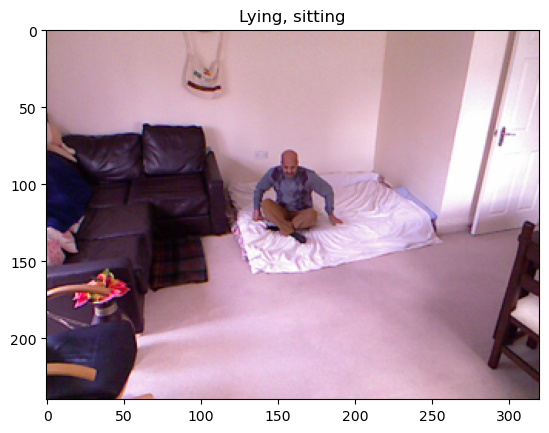

In [52]:
index = 1200
plt.imshow(read_image(index))
plt.title(label_dict[labels.loc[index, "class"]] + ", " + label_dict2[labels.loc[index, "class"]])
plt.show()

In [43]:
def parse_labels(labels):
    index = labels[labels["class"] == 3].index
    index = np.array(index)
    
    fall_parts = []
    start_index = None
    end_index = None
    for i in range(1, len(index)):
        if index[i] - index[i - 1] == 1:
            if start_index is None:
                start_index = i - 1
            end_index = i
        else:
            if start_index is not None and end_index is not None:
                fall_parts.append((index[start_index], index[end_index]))
            start_index = None
            end_index = None

    return fall_parts


def is_nearly_correct(fall_index, fall_parts):
    for start, end in fall_parts:
        if start - 10 <= fall_index <= end + 10:
            return True
    return False


def compute_accuracy(labels, fall_predictions):
    labels = labels[labels["class"] == 3]
    index = labels.index
    index = np.array(index)

    fall_parts = parse_labels(labels)
    print(fall_parts)
    print(fall_predictions)
    
    correct = []
    for fall_index in fall_predictions:
        if is_nearly_correct(fall_index, fall_parts):
            correct.append(1)
        else:
            correct.append(0)

    acc = sum(correct) / len(correct)
    print(f"Acc: {acc}")

In [44]:
with open("../prediction.txt", "r") as f:
    fall_predictions = f.readlines()

fall_predictions = list(map(int, fall_predictions))
fall_predictions = np.array(fall_predictions)
compute_accuracy(labels, fall_predictions)

[(np.int64(271), np.int64(361)), (np.int64(527), np.int64(622)), (np.int64(1057), np.int64(1147))]
[ 522  619  670 1112 1308 1322 1411 1456]
Acc: 0.375
